In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#1.Download the data from the file data source and provide possible data insights.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
!pip install nltk

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split, cross_val_score
import os
from itertools import cycle
!pip install textblob

from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, linear_model, metrics, datasets, multiclass, svm
import seaborn as sns
import numpy.random as nr

In [13]:
df = pd.read_csv("C:/Users/DELL/Downloads/complaints.csv (1)/complaints.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_2424\4200022238.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/DELL/Downloads/complaints.csv (1)/complaints.csv")


In [ ]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544
1,2024-02-26,Debt collection,Other debt,Threatened to contact someone or share informa...,Talked to a third-party about your debt,NaN,NaN,"Marlette Funding, LLC",IL,60060,NaN,Consent not provided,Web,2024-02-26,Closed with explanation,Yes,NaN,8424268
2,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",NC,27536,NaN,Consent not provided,Web,2024-02-26,Closed with non-monetary relief,Yes,NaN,8423775
3,2024-02-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,I am disappointed to have received a credit re...,NaN,LEXISNEXIS,CA,94124,NaN,Consent provided,Web,2024-02-20,Closed with explanation,Yes,NaN,8379830
4,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The companies, along with the credit reporting...",NaN,"EQUIFAX, INC.",NC,28804,NaN,Consent provided,Web,2024-01-26,Closed with non-monetary relief,Yes,NaN,8232435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167777,2023-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,76036,NaN,Other,Web,2023-08-02,Closed with non-monetary relief,Yes,NaN,7337991
5167778,2023-08-02,"Payday loan, title loan, or personal loan",Installment loan,Problem with additional add-on products or ser...,NaN,NaN,NaN,NBT BANCORP INC.,NJ,08046,NaN,NaN,Phone,2023-08-02,Closed with explanation,Yes,NaN,7343156
5167779,2023-08-02,Mortgage,FHA mortgage,Struggling to pay mortgage,NaN,NaN,Company believes it acted appropriately as aut...,Chesmar Homes,TX,77316,NaN,Other,Web,2023-08-17,Closed with explanation,Yes,NaN,7340709
5167780,2023-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",GA,30013,NaN,Consent not provided,Web,2023-08-02,Closed with explanation,Yes,NaN,7341166


DATA Understanding


In [16]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 2
Sub-issue                        735101
Consumer complaint narrative    3351574
Company public response         2693192
Company                               0
State                             45611
ZIP code                          30225
Tags                            4684932
Consumer consent provided?      1026812
Submitted via                         0
Date sent to company                  0
Company response to consumer         14
Timely response?                      0
Consumer disputed?              4399466
Complaint ID                          0
dtype: int64

In [17]:
df.nunique()

Date received                      4539
Product                              21
Sub-product                          86
Issue                               178
Sub-issue                           272
Consumer complaint narrative    1480084
Company public response              11
Company                            7204
State                                63
ZIP code                          33632
Tags                                  3
Consumer consent provided?            4
Submitted via                         7
Date sent to company               4488
Company response to consumer          8
Timely response?                      2
Consumer disputed?                    2
Complaint ID                    5167782
dtype: int64

In [18]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167782 entries, 0 to 5167781
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 709.

In [26]:

print(df.columns)


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [28]:
print(df.head())


  Date received                                            Product  \
0    2024-01-24  Credit reporting or other personal consumer re...   
1    2024-02-26                                    Debt collection   
2    2024-02-26  Credit reporting or other personal consumer re...   
3    2024-02-20  Credit reporting or other personal consumer re...   
4    2024-01-26  Credit reporting or other personal consumer re...   

        Sub-product                                              Issue  \
0  Credit reporting               Incorrect information on your report   
1        Other debt  Threatened to contact someone or share informa...   
2  Credit reporting               Incorrect information on your report   
3  Credit reporting                        Improper use of your report   
4  Credit reporting               Incorrect information on your report   

                                       Sub-issue  \
0                  Account information incorrect   
1        Talked to a third-par

In [33]:
df.shape



(5167782, 18)

In [35]:
print(df.columns)


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


C:\Users\DELL\AppData\Local\Temp\ipykernel_2424\2714272628.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/DELL/Downloads/complaints.csv (1)/complaints.csv")


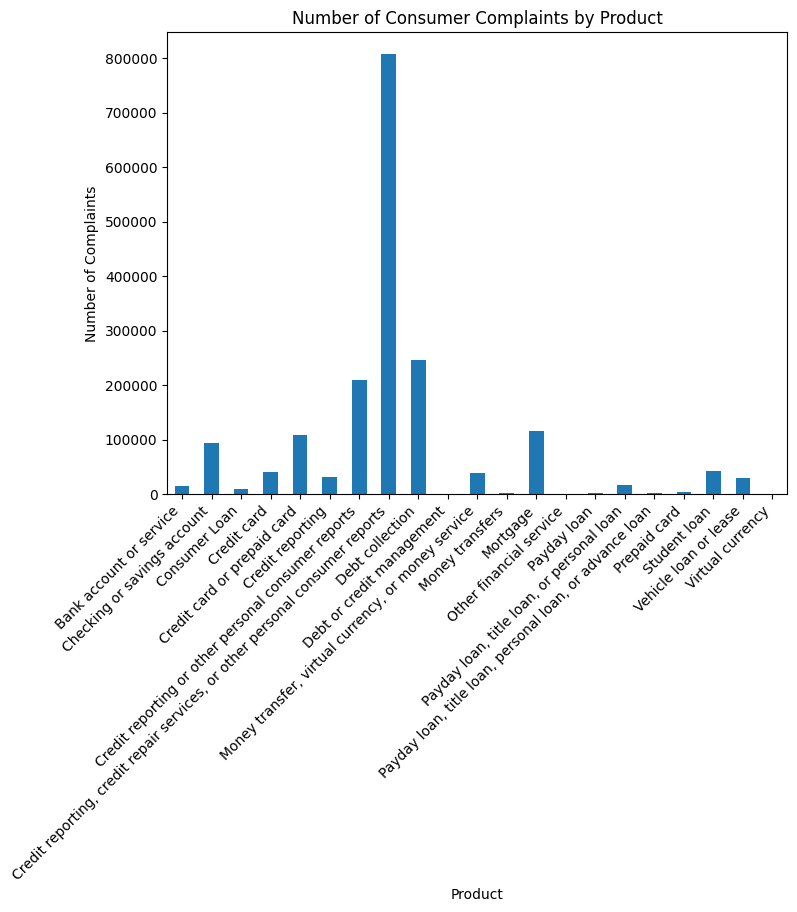

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("C:/Users/DELL/Downloads/complaints.csv (1)/complaints.csv")

# Plot the data
fig = plt.figure(figsize=(8, 6))
df.groupby('Product')['Consumer complaint narrative'].count().plot.bar()
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.title('Number of Consumer Complaints by Product')
plt.xticks(rotation=45, ha='right')
plt.show()


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [7]:
!pip install pandas
import pandas as pd
df = pd.read_csv("C:/Users/DELL/Downloads/complaints.csv (1)/complaints.csv")
# Drop rows with missing values in the "Consumer complaint narrative" column
df.dropna(subset=['Consumer complaint narrative'], inplace=True)

# Initialize TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', max_features=5000)

# Fit and transform the consumer complaint narratives into TF-IDF features
tfidf_vect.fit(df['Consumer complaint narrative'])
Features = tfidf_vect.transform(df['Consumer complaint narrative'])

# Initialize LabelEncoder
encoder = preprocessing.LabelEncoder()

# Fit and transform the 'Product' column into numerical labels
Labels1 = encoder.fit_transform(df['Product'])


C:\Users\DELL\AppData\Local\Temp\ipykernel_10208\691119614.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/DELL/Downloads/complaints.csv (1)/complaints.csv")


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3464, in run_ast_nodes
    code = compiler(mod, cell_name, mode)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\codeop.py", line -1, in __call__
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppData\Local\Prog

In [1]:
#2. Given an unsorted array of integers, find the length of the longest continuous
#increasing subsequence (subarray).

def findLengthOfLCIS(nums):
    if not nums:
        return 0
    
    max_length = 1
    current_length = 1
    
    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1
    
    return max_length

# Example usage:
input1 = [1, 3, 5, 4, 7]
input2 = [2, 2, 2, 2, 2]

print("Example 1 output:", findLengthOfLCIS(input1))  # Output: 3
print("Example 2 output:", findLengthOfLCIS(input2))  # Output: 1




Example 1 output: 3
Example 2 output: 1


In [3]:
#3.Given a list of non negative integers, arrange them such that they form the largest
#number.

from functools import cmp_to_key

def largestNumber(nums):
    # Define a custom comparison function for sorting
    def compare(a, b):
        return int(b + a) - int(a + b)

    # Convert numbers to strings for comparison
    nums = [str(num) for num in nums]
    
    # Sort the numbers using the custom comparison function
    nums.sort(key=cmp_to_key(compare))
    
    # Handle case where all elements are 0
    if nums[0] == '0':
        return '0'
    
    # Concatenate the sorted numbers and return
    return ''.join(nums)

# Example usage:
input1 = [10, 2]
input2 = [3, 30, 34, 5, 9]

print("Example 1 output:", largestNumber(input1))  # Output: "210"
print("Example 2 output:", largestNumber(input2))  # Output: "9534330"


Example 1 output: 210
Example 2 output: 9534330


In [ ]:
#4. Store all the &quot;servlet-name&quot;, and &quot;servlet-class&quot; to a csv file from the attached
#sample_json.json file using Python.

In [5]:
import json
import csv

# Read the JSON file
with open('C:/Users/DELL/Downloads/DT A1 sample_json (1) (1).json') as json_file:
    data = json.load(json_file)

# Extract "servlet-name" and "servlet-class" from the JSON data
servlet_data = [(servlet['servlet-name'], servlet['servlet-class']) for servlet in data['web-app']['servlet']]

# Write the extracted data to a CSV file
with open('servlet_data.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    # Write header
    writer.writerow(['servlet-name', 'servlet-class'])
    # Write data
    writer.writerows(servlet_data)

print("Data has been successfully stored in servlet_data.csv file.")


Data has been successfully stored in servlet_data.csv file.
